[*********************100%***********************]  1 of 1 completed


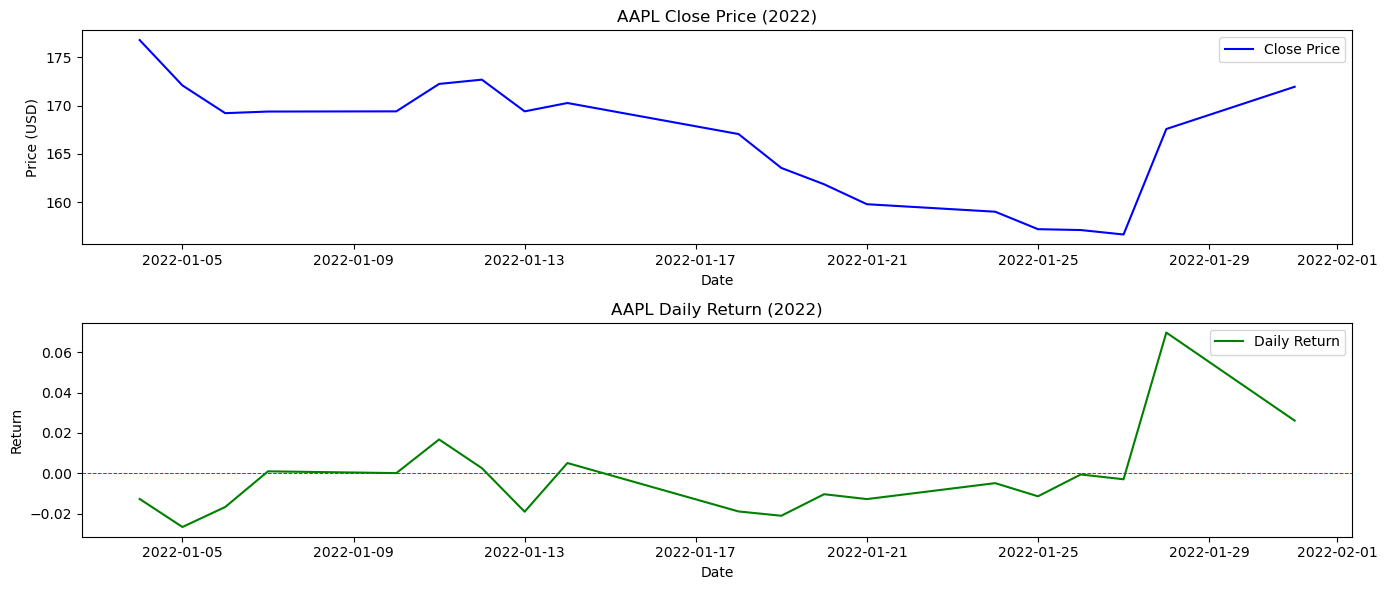

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt
data = yf.download("AAPL", start="2022-01-01", end="2022-02-01")

data['Return'] = data['Close'].pct_change()

# drop null
data = data.dropna()

# close price
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title("AAPL Close Price (2022)")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['Return'], label='Daily Return', color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=0.7) 
plt.title("AAPL Daily Return (2022)")
plt.ylabel("Return")
plt.xlabel("Date")
plt.legend()

plt.tight_layout()
plt.show()


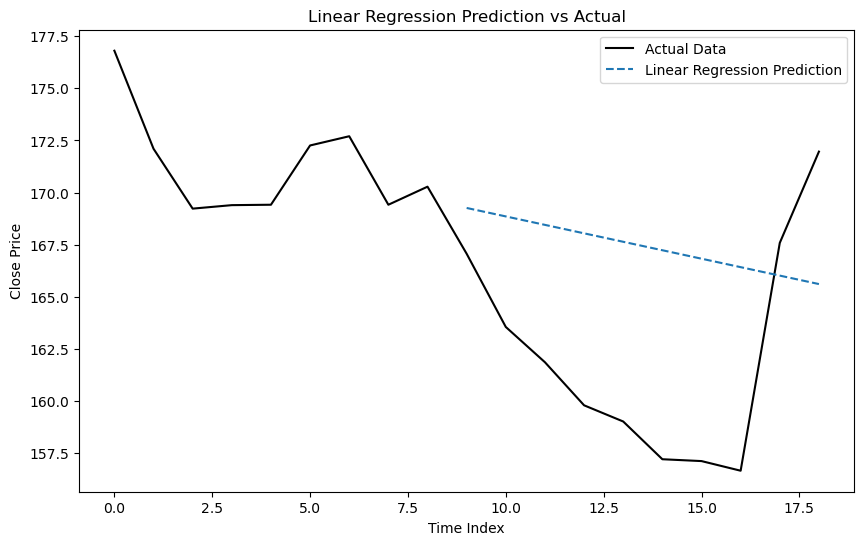

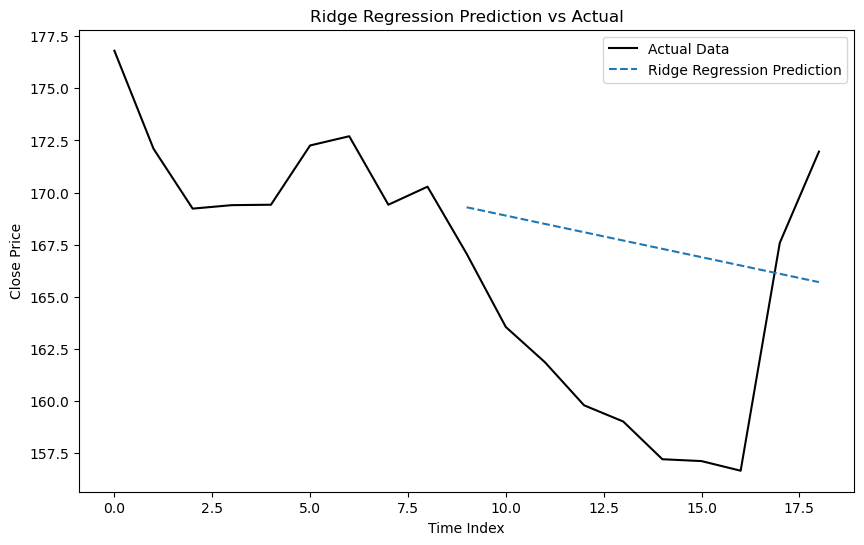

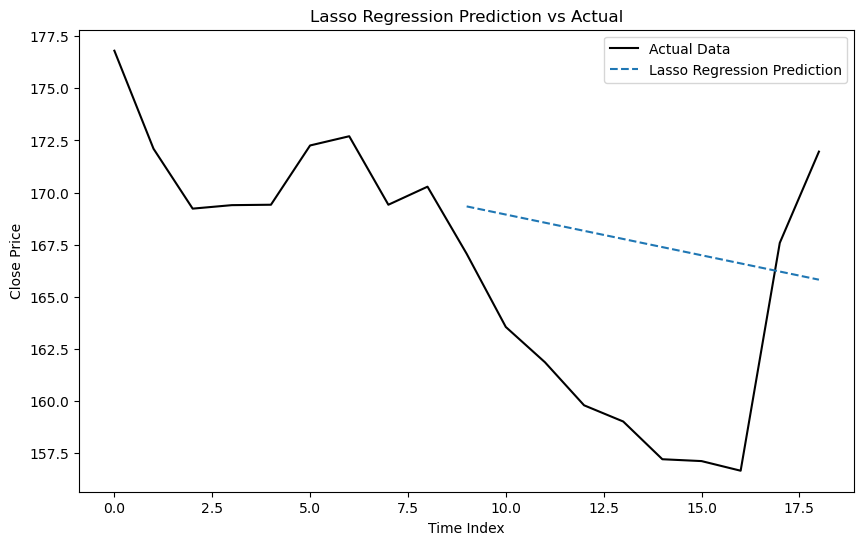

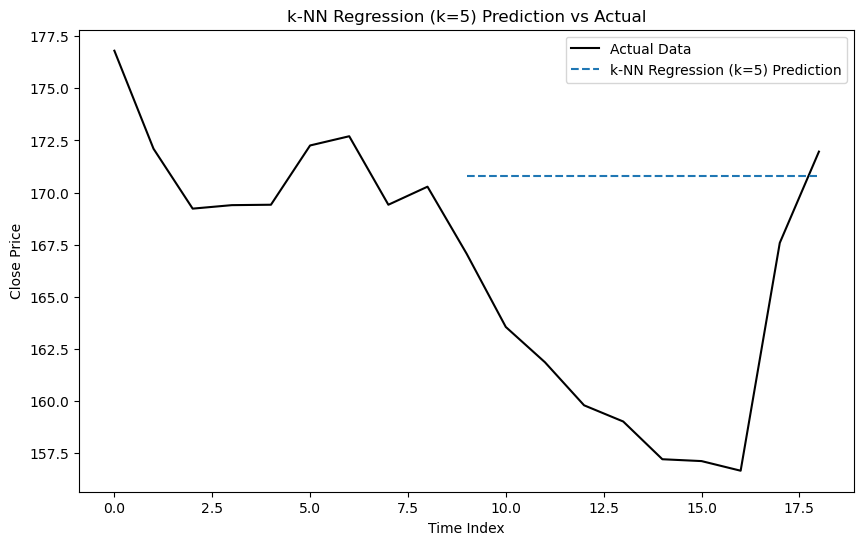

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# here use 1D
X = np.arange(len(data)).reshape(-1, 1)  
y = data['Close'].values  

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=False)

# 4models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "k-NN Regression (k=5)": KNeighborsRegressor(n_neighbors=5)
}

# train
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

    # visualization
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(data)), y, label="Actual Data", color="black")
    plt.plot(range(len(X_train), len(data)), y_pred, label=f"{name} Prediction", linestyle="--")
    plt.xlabel("Time Index")
    plt.ylabel("Close Price")
    plt.title(f"{name} Prediction vs Actual")
    plt.legend()
    plt.show()

# print("Mean Squared Errors for Each Model:")
# for name, mse in results.items():
#     print(f"{name}: {mse:.4f}")


[*********************100%***********************]  1 of 1 completed

9.241738947049619


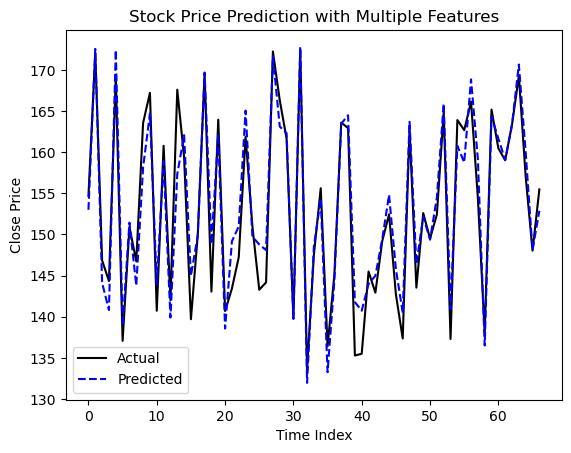

In [20]:
data = yf.download("AAPL", start="2022-01-01", end="2022-12-01")
data['Return'] = data['Close'].pct_change()  
data['5_day_MA'] = data['Close'].rolling(window=5).mean()  
data['10_day_MA'] = data['Close'].rolling(window=10).mean()  
data['Volume_Change'] = data['Volume'].pct_change() 
data = data.dropna()  


X = data[['5_day_MA', '10_day_MA', 'Volume_Change']] 
y = data['Close'] 


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)
import matplotlib.pyplot as plt
plt.plot(range(len(y_test)), y_test.values, label='Actual', color='black')
plt.plot(range(len(y_test)), y_pred, label='Predicted', linestyle='--', color='blue')
plt.legend()
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction with Multiple Features')
plt.show()


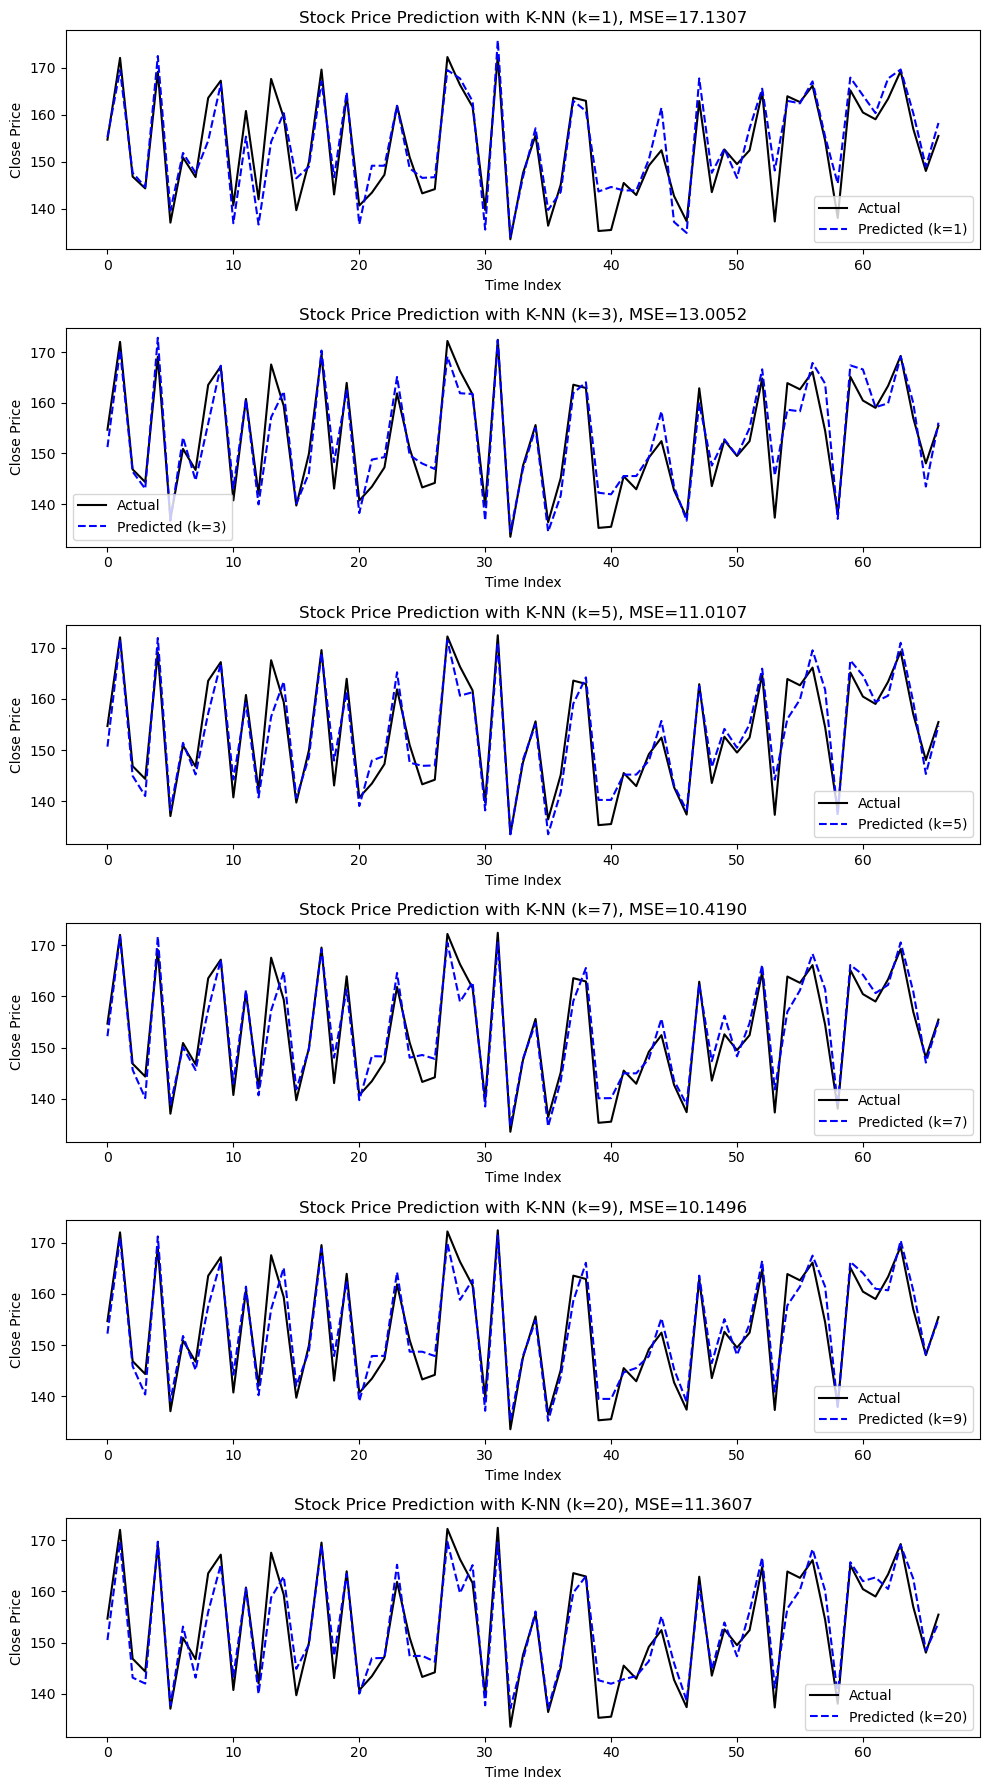

K=1, MSE=17.1307
K=3, MSE=13.0052
K=5, MSE=11.0107
K=7, MSE=10.4190
K=9, MSE=10.1496
K=20, MSE=11.3607


In [21]:
K_values = [1, 3, 5, 7, 9, 20]  
mse_list = []

plt.figure(figsize=(10, len(K_values) * 3))

for i, k in enumerate(K_values):
    model2 = KNeighborsRegressor(n_neighbors=k)
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    
    plt.subplot(len(K_values), 1, i + 1)
    plt.plot(range(len(y_test)), y_test.values, label='Actual', color='black')
    plt.plot(range(len(y_test)), y_pred, label=f'Predicted (k={k})', linestyle='--', color='blue')
    plt.legend()
    plt.xlabel('Time Index')
    plt.ylabel('Close Price')
    plt.title(f'Stock Price Prediction with K-NN (k={k}), MSE={mse:.4f}')

plt.tight_layout()
plt.show()

for k, mse in zip(K_values, mse_list):
    print(f"K={k}, MSE={mse:.4f}")
